<a href="https://colab.research.google.com/github/piyush1856/hypothesis-testing-scipy/blob/main/feature_engineering_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [87]:
!wget --no-check-certificate https://drive.google.com/uc?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc -O loan.csv

--2024-09-08 16:17:23--  https://drive.google.com/uc?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc
Resolving drive.google.com (drive.google.com)... 74.125.195.101, 74.125.195.138, 74.125.195.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc [following]
--2024-09-08 16:17:23--  https://drive.usercontent.google.com/download?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 74.125.197.132, 2607:f8b0:400e:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|74.125.197.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38011 (37K) [application/octet-stream]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  37.12K  --.-KB/s    in 0s      

2024-09-08 16:17:25 (108 MB/s) - ‘loan.c

In [3]:
data = pd.read_csv('loan.csv')
data.shape

(614, 13)

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [6]:
data["Dependents"].value_counts()

,count
Dependents,
0,345
1,102
2,101
3+,51


In [7]:
data = data.drop('Loan_ID',axis = 1)

In [8]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
data.describe(include = 'object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [10]:
data.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14
Credit_History,50


In [11]:
cat_cols = data.dtypes=='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [12]:
num_cols = data.dtypes!='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [13]:
cat_cols.remove('Loan_Status')
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [14]:
#Skewness

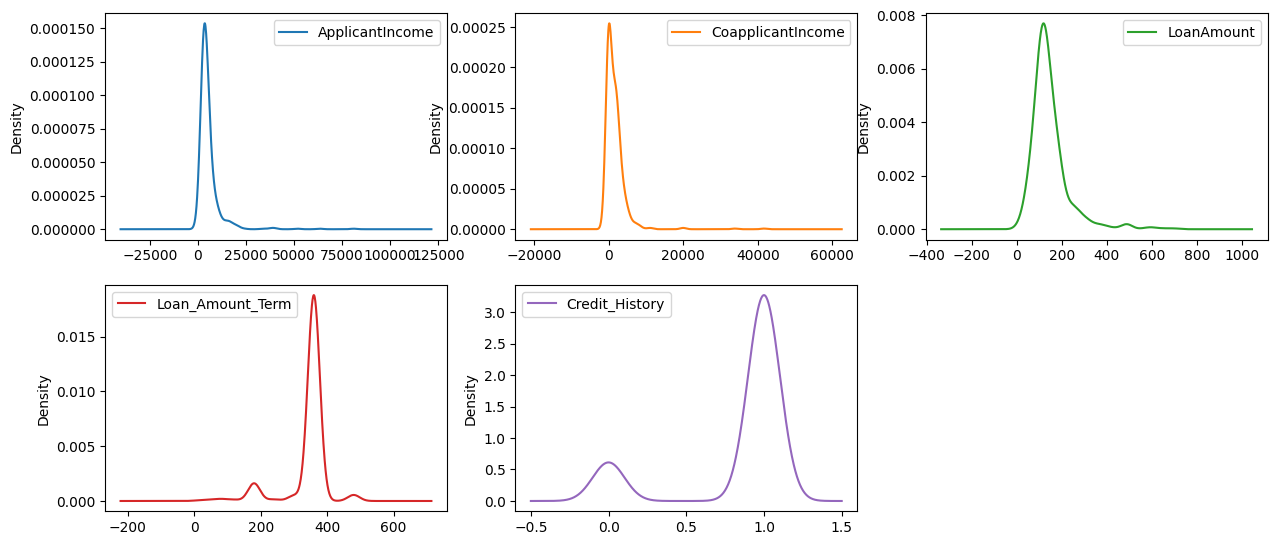

In [15]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,10]
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

In [16]:
print(data.skew(numeric_only=True)) #quantification

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64


In [17]:
#Kurtosis

In [18]:
print(data.kurt(numeric_only=True))

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64


In [19]:
#Univariate Analysis

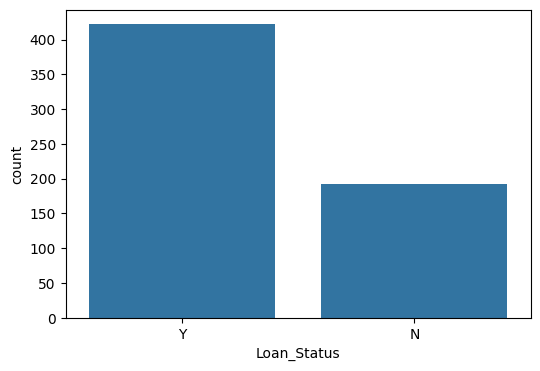

In [20]:
data['Loan_Status'].value_counts()
target = 'Loan_Status'
plt.rcParams["figure.figsize"] = [6,4]
sns.countplot(data=data, x='Loan_Status')
plt.show()

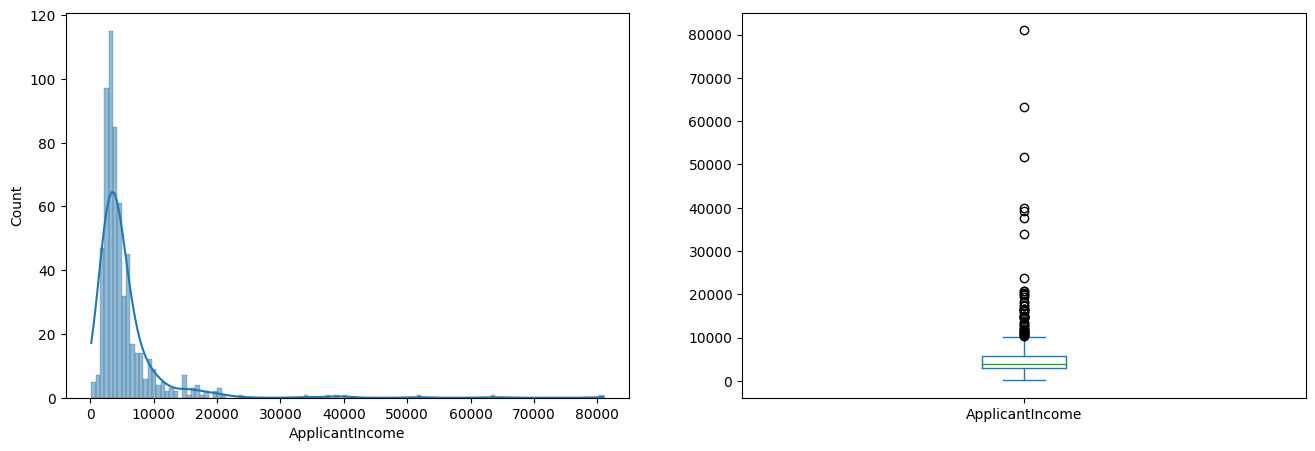

In [21]:
plt.subplot(121)
sns.histplot(data["ApplicantIncome"], kde=True)

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [22]:
data.groupby("Loan_Status")['ApplicantIncome'].mean()

,ApplicantIncome
Loan_Status,
N,5446.078125
Y,5384.068720


In [23]:
from scipy.stats import ttest_ind

a = data[data["Loan_Status"]=="Y"]["ApplicantIncome"]
b = data[data["Loan_Status"]=="N"]["ApplicantIncome"]

# H0: Income and Loan status are independent
# Ha: Dependent
ttest_ind(a, b)

TtestResult(statistic=-0.11650844828724542, pvalue=0.907287812130518, df=612.0)

In [24]:
#Binning

In [25]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low', 'Average', 'Medium', 'H1', 'H2', 'H3', 'H4', 'Very High']

In [26]:
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium


In [27]:
pd.crosstab(data["Income_bin"],data["Loan_Status"])

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
Medium,45,98
H1,20,34
H2,9,22
H3,13,27
H4,3,6
Very High,1,2


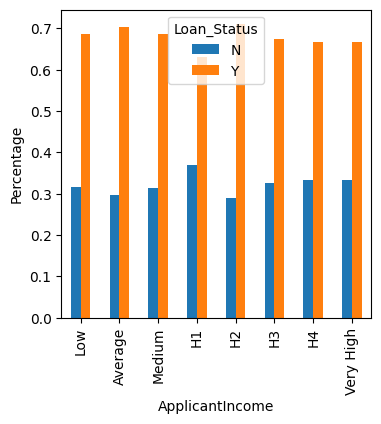

In [28]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"], normalize="index")
Income_bin.plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

In [29]:
from scipy.stats import chi2_contingency

val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values
#print(val)

# H0: Loan status and Income are independent
chi2_contingency(val)

Chi2ContingencyResult(statistic=1.2420001711303135, pvalue=0.9899274842922701, dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

In [30]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium,6000.0


In [31]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [32]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,Medium,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,Medium,6091.0,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,Medium,6000.0,High


<Axes: xlabel='TotalIncome_bin'>

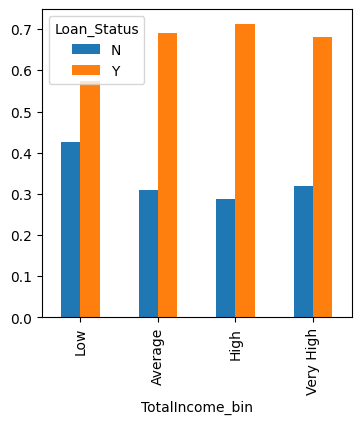

In [33]:
vals_n = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"], normalize="index")
vals_n.plot(kind="bar",figsize=(4,4))


In [34]:
vals = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])
vals

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


In [35]:
chi2_contingency(vals)

Chi2ContingencyResult(statistic=3.428480885250809, pvalue=0.3301570564076713, dof=3, expected_freq=array([[ 14.6970684 ,  32.3029316 ],
       [ 69.73289902, 153.26710098],
       [ 66.29315961, 145.70684039],
       [ 41.27687296,  90.72312704]]))

In [36]:
#Create new feature

In [37]:
data['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [38]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')

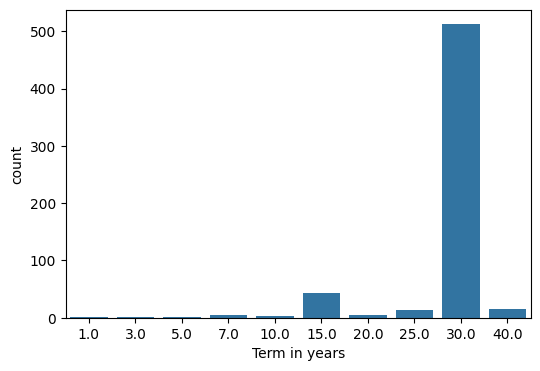

In [39]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

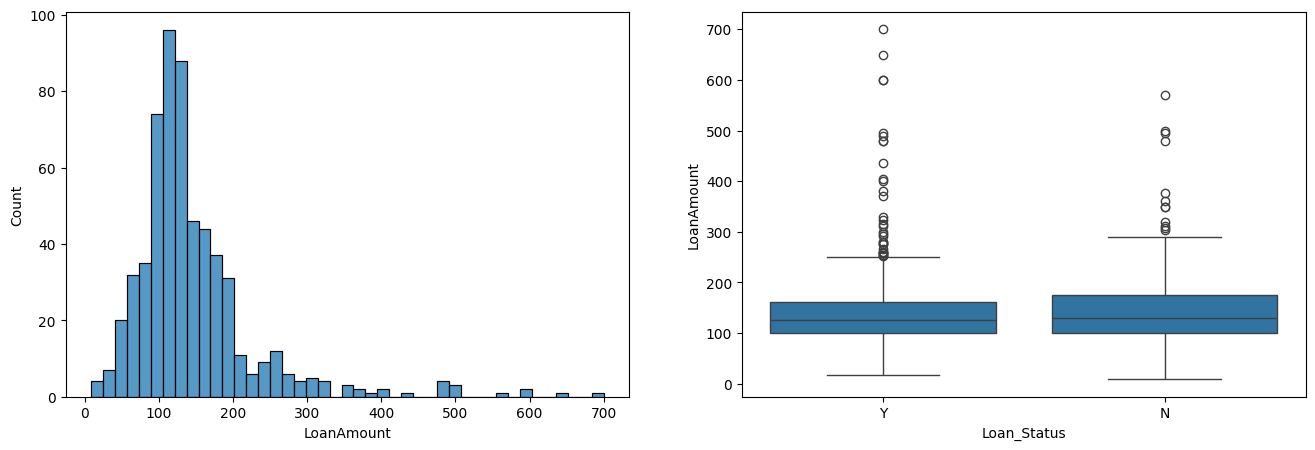

In [40]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

In [41]:
#EMI

In [42]:
data['Loan_Amount_per_year']  = data['LoanAmount']/data['Loan_Amount_Term']

In [43]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,5849.0,High,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000


In [44]:
data['EMI'] = data['Loan_Amount_per_year']*1000/12
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,5849.0,High,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667


In [45]:
#Ability_to_pay_EMI

In [46]:
data['Able_to_pay_EMI'] = (data['TotalIncome']* 0.4 > data['EMI']).astype('int')

In [47]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


<Axes: xlabel='Able_to_pay_EMI', ylabel='count'>

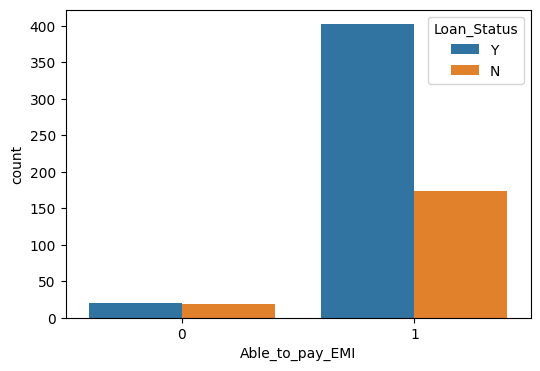

In [48]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

In [49]:
vals = pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status'])
vals

Loan_Status,N,Y
Able_to_pay_EMI,,
0,19,20
1,173,402


In [50]:
chi2_contingency(pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status']))

Chi2ContingencyResult(statistic=5.06370716479013, pvalue=0.024431922578328144, dof=1, expected_freq=array([[ 12.19543974,  26.80456026],
       [179.80456026, 395.19543974]]))

In [51]:
data.to_csv('updated_loan.csv',index=False)

```
We have been given a dataset containing the details of the people applied for loan.

dataset: loan.csv

We wish to create a new feature called 'NewFeature' using a linear combination of the features ApplicantIncome, LoanAmount and Credit_History, with weights 1, 3 and 7000,

i.e., data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"]).

Since 'NewFeature' is a numerical feature, convert it to a categorical feature by checking whether 'NewFeature' is greater than 0.25 times the mean of 'NewFeature'. Call this feature 'Separator'.

Perform a chi-square test on the contingency table formed by the features 'Loan_Status' and 'Separator' and report the p-value. Also report your interpretation.

Note: Drop all the rows having 'na' values before performing any operation on the data and assume the significance level to be 5%. Also, round off the p-value to four decimal places.
```

In [52]:
data.sample(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
80,Female,No,0,Graduate,No,3846,0.0,111.0,30.0,1.0,Semiurban,Y,Average,3846.0,Average,3.700000,308.333333,1
336,Male,Yes,1,Graduate,NaN,5250,688.0,160.0,30.0,1.0,Rural,Y,Medium,5938.0,High,5.333333,444.444444,1
145,Female,Yes,0,Graduate,No,2330,4486.0,100.0,30.0,1.0,Semiurban,Y,Low,6816.0,High,3.333333,277.777778,1
169,Male,Yes,2,Graduate,No,8000,0.0,200.0,30.0,1.0,Semiurban,Y,H1,8000.0,High,6.666667,555.555556,1
416,Female,No,1,Graduate,No,2600,0.0,160.0,30.0,1.0,Urban,N,Average,2600.0,Low,5.333333,444.444444,1


In [55]:
data = data.dropna()

In [56]:
data.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


In [58]:
data['NewFeature'] = (data["ApplicantIncome"]) + (3 * data["LoanAmount"]) + (7000 * data["Credit_History"])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1,11967.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1,10198.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1,9943.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1,13423.0
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,30.0,1.0,Urban,Y,Medium,9613.0,Very High,8.900000,741.666667,1,13218.0


In [59]:
mean_new_feature = data['NewFeature'].mean()
data['Separator'] = np.where(data['NewFeature'] > 0.25 * mean_new_feature, 1, 0)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI,NewFeature,Separator
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1,11967.0,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1,10198.0,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1,9943.0,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1,13423.0,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,30.0,1.0,Urban,Y,Medium,9613.0,Very High,8.900000,741.666667,1,13218.0,1


In [60]:
data.dtypes

,0
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64
Credit_History,float64


In [66]:
contingency_table = pd.crosstab(data['Loan_Status'], data['Separator'], margins = True)
contingency_table

Separator,0,1,All
Loan_Status,,,
N,11,137,148
Y,2,330,332
All,13,467,480


In [68]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
chi2, p_value, dof, expected

(18.122792156485815,
 0.0011677340142607316,
 4,
 array([[  4.00833333, 143.99166667, 148.        ],
        [  8.99166667, 323.00833333, 332.        ],
        [ 13.        , 467.        , 480.        ]]))

In [69]:
print(f"p-value: {round(p_value, 4)}")
if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant association between Loan_Status and Separator.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between Loan_Status and Separator.")


p-value: 0.0012
Reject the null hypothesis: There is a significant association between Loan_Status and Separator.


```
The following list contains data about the age of visitors, in a mall.

data=[38,36,31,30,20,28,25,26,19,21,19,21,20,21,21,20,21,24,32,35,38,38]

Based on the given data, decide the distribution of data.
```

In [74]:
import scipy.stats as stats

data=[38,36,31,30,20,28,25,26,19,21,19,21,20,21,21,20,21,24,32,35,38,38]

stats.skew(data)

0.5271318483027255

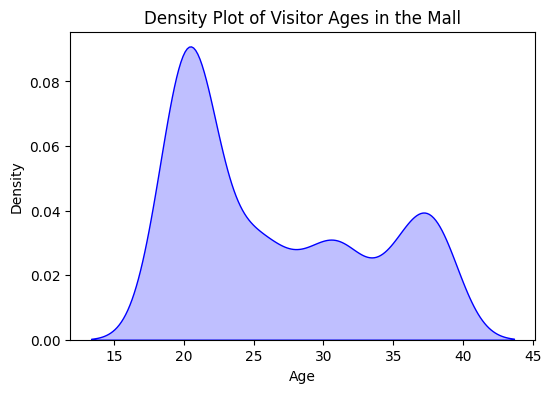

In [75]:
# Create the density plot
sns.kdeplot(data, fill=True, color="blue", bw_adjust=0.5)

# Adding labels and title
plt.title('Density Plot of Visitor Ages in the Mall')
plt.xlabel('Age')
plt.ylabel('Density')

# Show plot
plt.show()

```
Data distributions can be named based on the kurtosis value. Specifically, for given kurtosis k :

If k = 3, it is called a Mesokurtic distribution and has kurtosis statistics similar to a normal distribution.
For k > 3, it is called a Leptokurtic distribution (has a profound number of outliers)
And for k < 3, it is called a Platykurtic distribution (shows lack of outliers).
Based on this information, given a data sample [4, 6, 2, 18, 7, 2], what would be this kind of distribution called?
```

In [82]:
data = pd.Series([4, 6, 2, 18, 7, 2])
print(data.kurt(numeric_only=True))

3.7162188375322973


```
In the loan.csv dataset, we wish to test the hypothesis that among all loan applicants who were rejected for a loan, applicants with a credit history of 1 are more likely to be female.

Use a chi-square test to verify this claim (Ensure that you drop all nan rows), and report your interpretation.

Note: Use a significance level of 5%.
```

In [99]:
data = pd.read_csv('loan.csv')
data.shape
data = data.dropna()

In [106]:
rejected_applicants = data[data['Loan_Status'] == 'N']
contingency_table = pd.crosstab(rejected_applicants['Gender'], rejected_applicants['Credit_History'] == 1)
contingency_table

Credit_History,False,True
Gender,,
Female,13,19
Male,50,66


In [107]:
chi2, p_value, dof, expected = chi2_contingency(contingency_table)


In [108]:
print(f"p-value: {round(p_value, 4)}")
if p_value < 0.05:
    print("Reject the null hypothesis: Female applicants with a credit history of 1 are significantly more likely to be rejected for a loan.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between male and female applicants with credit history 1 in terms of loan rejection.")


p-value: 0.9608
Fail to reject the null hypothesis: There is no significant difference between male and female applicants with credit history 1 in terms of loan rejection.


```
You're monitoring the daily website traffic of an online blog over a month. The daily visitors (in hundreds) are represented by the following sample data.

Data: [10, 20, 20 , 40, 50, 60, 70, 60, 50, 40, 30, 20, 10, 10, 10, 20, 20, 30, 40, 50, 50, 60, 60, 80, 90, 100, 100, 120, 100, 90, 80]

Which of the following statements are true about traffic distribution?

a) The distribution is not skewed.

b) The distribution is positively skewed.

c) The distribution is platykurtic.

d) The distribution is leptokurtic.

e) mean > median > mode

f) mean < median < mode

g) There are no outliers present in the dataset.

h) The distribution is mesokurtic.
```

In [110]:
Data_traff = [10, 20, 20 , 40, 50, 60, 70, 60, 50, 40, 30, 20, 10, 10, 10, 20, 20, 30, 40, 50, 50, 60, 60, 80, 90, 100, 100, 120, 100, 90, 80]

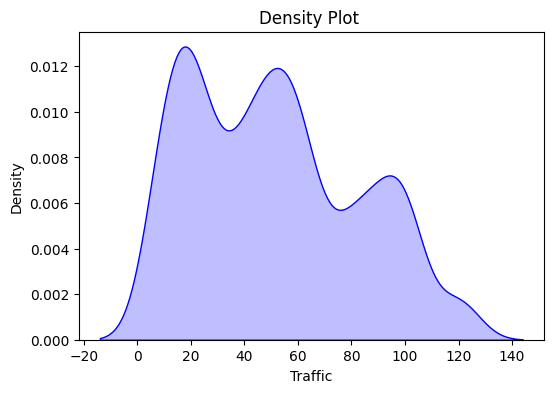

In [114]:
# Skewness
# Create the density plot
sns.kdeplot(Data_traff, fill=True, color="blue", bw_adjust=0.5)

# Adding labels and title
plt.title('Density Plot ')
plt.xlabel('Traffic')
plt.ylabel('Density')

print()

# Show plot
plt.show()

In [115]:
stats.skew(Data_traff)

0.4097366271719369

In [118]:
#Kurtosis
data_traff = pd.Series(Data_traff)
print(data_traff.kurt(numeric_only=True))

-0.823086089059716


In [119]:
data_traff.mean(), data_traff.median(), data_traff.mode()

(51.29032258064516,
 50.0,
 0    20
 dtype: int64)

<Axes: >

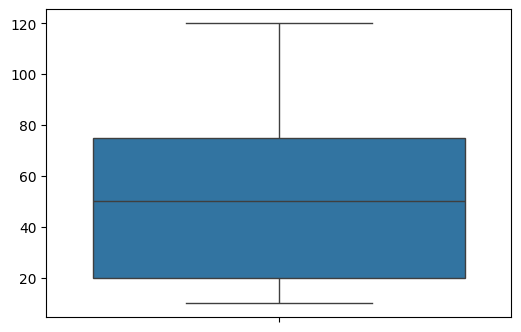

In [120]:
sns.boxplot(Data_traff)

```
You're analyzing the income distribution of 30 households in a small town.

Their annual income (in thousands of dollars) is represented by the following sample data.

Data: [15, 20, 25, 25, 28, 30, 32, 35, 35, 35, 38, 40, 42, 45, 45, 48, 50, 52, 55, 60, 65, 70, 75, 75, 80, 90, 95, 100, 120, 250]

Which of the following statements is true about the income distribution?

a)The distribution is negatively skewed (left tail longer than right tail).

b) The distribution is positively skewed (right tail longer than left tail).

c) The distribution is platykurtic (less peaked than a normal distribution).

d) The distribution is leptokurtic (more peaked than a normal distribution).

e) mean > median > mode

f) mean < median < mode

g) There are no outliers present in the dataset.
```

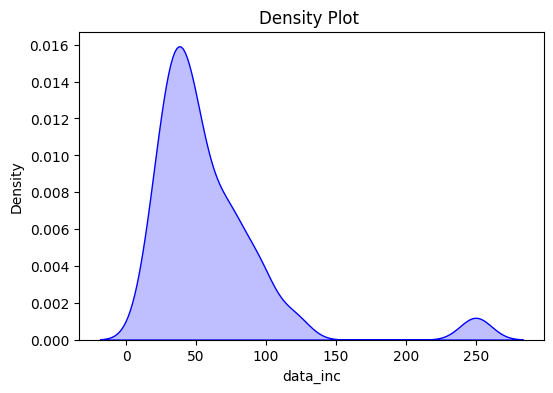

In [121]:
data_inc = pd.Series([15, 20, 25, 25, 28, 30, 32, 35, 35, 35, 38, 40, 42, 45, 45, 48, 50, 52, 55, 60, 65, 70, 75, 75, 80, 90, 95, 100, 120, 250])

# Skewness
# Create the density plot
sns.kdeplot(data_inc, fill=True, color="blue", bw_adjust=0.5)

# Adding labels and title
plt.title('Density Plot ')
plt.xlabel('data_inc')
plt.ylabel('Density')

print()

# Show plot
plt.show()

In [122]:
#Kurtosis
data_inc = pd.Series(data_inc)
print(data_inc.kurt(numeric_only=True))

11.561565065780405


```
We believe that the loan.csv data shows that graduate unmarried men are in a different income group than both married and unmarried graduate women.

To prove this, would a t-test be more appropriate or a chi-square test?

Carry out the test on the 'ApplicantIncome' column for the two groups and report the p-value. Also report your interpretation.

Note: Assume a confidence level of 95% and round off the p-value to 2 decimal places.
```

In [132]:
data = pd.read_csv('loan.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [133]:
# Load the Income data for graduate unmarried men
unmarried_graduate_men = data[(data["Gender"] == "Male") & (data["Married"] == "No") & (data["Education"] == "Graduate")]["ApplicantIncome"]
unmarried_graduate_men.dropna(inplace=True)
print("Number of unmarried graduate men datapoints: ", len(unmarried_graduate_men))

# Load the data for graduate women
graduate_women = data[(data["Gender"] == "Female") & (data["Education"] == "Graduate")]["ApplicantIncome"]
graduate_women.dropna(inplace=True)
print("Number of graduate women datapoints: ", len(graduate_women))

# Perform a t-test since the incomes are a continuous variable.
p_value = ttest_ind(unmarried_graduate_men, graduate_women)[1]
print("p_value :" ,round(p_value,2))

if p_value > 0.05:
 print('Since p_value > 0.05 we fail to reject the null hypothesis.')

else:
 print('Since p_value < 0.05 we reject the null hypothesis.')


Number of unmarried graduate men datapoints:  99
Number of graduate women datapoints:  92
p_value : 0.08
Since p_value > 0.05 we fail to reject the null hypothesis.
